# Data Science and Visualization (RUC F2023)

## Lecture 3: Data Visualization

# Basic Visualizations

* ### Histogram
* ### Bar chart
* ### Boxplot
* ### Scatterplot
* ### Line chart

We demonstrate with a number of synthetic datasets about kids health. This notebook contains both demo code and exercise (with blank cells). We use the library of **matplotlib.pyplot** for making the basic plots.

## 0. Setup and construct the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame([['Alis', 'Female', 2, 90, 13, 'Negative', 'Yes'],
                   ['Alex', 'Male', 6, 100, 20, 'Negative', 'Yes'],
                   ['Bo', 'Male', 2, 80, 10, 'Negative', 'Yes'],
                   ['Chris', 'Male', 2, 90, 17, 'Positive', 'Yes'],
                   ['Daisy', 'Female', 2, 90, 17, 'Positive', 'No'],
                   ['John', 'Male', 3, 96, 15, 'Negative', 'Yes'],
                   ['Kate', 'Female', 4, 100, 19, 'Negative', 'No'],
                   ['Sebastian', 'Male', 5, 110, 19, 'N/A', 'Yes'],
                   ['Mads', 'Male', 3, 100, None, 'Positive', 'No'],
                   ['Emil', 'Male', 5, None, 18, 'Negative', 'No'],
                   ['Kelly', 'Female', 4, 100, 18, 'Positive', 'Yes'],
                   ['Karin', 'Female', 5, 90, 15, 'Positive', 'No'],
                   ['Sarah', 'Female', 3, 90, 13, 'Negative', 'No']], 
                  columns=["Name", "Gender", "Age", "Height", "Weight", "Test", 'Fever'])

df

,Name,Gender,Age,Height,Weight,Test,Fever
0,Alis,Female,2,90.0,13.0,Negative,Yes
1,Alex,Male,6,100.0,20.0,Negative,Yes
2,Bo,Male,2,80.0,10.0,Negative,Yes
3,Chris,Male,2,90.0,17.0,Positive,Yes
4,Daisy,Female,2,90.0,17.0,Positive,No
5,John,Male,3,96.0,15.0,Negative,Yes
6,Kate,Female,4,100.0,19.0,Negative,No
7,Sebastian,Male,5,110.0,19.0,N/A,Yes
8,Mads,Male,3,100.0,NaN,Positive,No
9,Emil,Male,5,NaN,18.0,Negative,No


## 1. Histogram

We can call plt.hist(.) directly to get the histogram for a column.

### 1.0 We create an array of numbers following a normal distribution

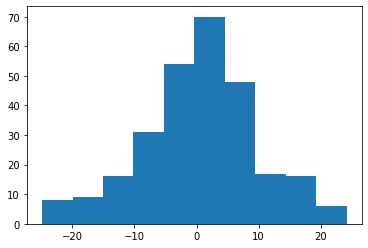

In [20]:
# A normal distribution with mean=0 and std=10. The number of values is 275.
x = np.random.normal(0, 10, 275)

# If we print x, it will look like this:
"""
print(x)
[-12.86467624  -1.55637358   2.04774988  -2.78593052   7.0037208
  -2.2541189   -8.15792232 -16.54421057   4.7852369  -17.48727612
 ... ...
 -9.86399721 -15.79293859   6.11728893   9.6049965    9.6579244
  14.4480663   -4.02353426  -0.49568545   1.29181534  -4.13082611]
"""

# Let's plot the histogram of all values in x
plt.hist(x)
plt.show() 

### 1.1 We create a histgram for the Fever column in the children health data.

Text(0.5, 1.0, 'Histogram of Fever')

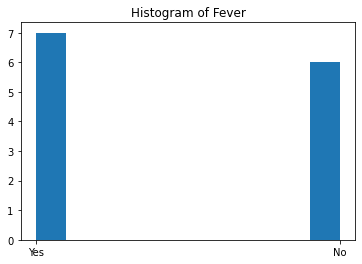

In [100]:
plt.hist(df.Fever)

plt.title('Histogram of Fever')

### 1.2 We create a function to create histgram for a given column.

A histogram like above needs some 'decorations', e.g., for the Y ticks and title. Those decorations could be the same for all such histograms. Therefore, we define a function that takes a an arbitrary column to plot histogram for and automate some things, e.g., the range of the column.

In [14]:
def plotHistgram(data, title='Histogram'):
    plt.hist(data)
    plt.title(title)
    
    # We obtain the max and min counts and use them to decide the Y ticks.
    data_counted = data.value_counts()
    upper = data_counted.nlargest(1).values[0]
    lower = data_counted.nsmallest(1).values[0]
    plt.yticks(range(0, upper+1))
    
    # We can also do so likewise for the X axis but it will be more complicated.
    # A much easier way is to let the caller of this function to decide the X ticks.
    # Parameter 'ha' means horizontal alignment for the x ticks. If you 
    #plt.xticks([3, 4, 5], ha='center')
    plt.xticks(ha='center')

We use the function to create a histogram for the Fever column.

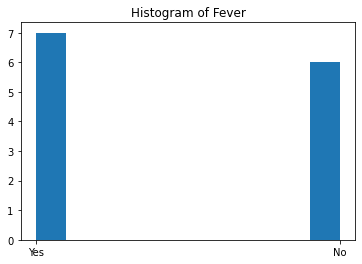

In [101]:
plotHistgram(df.Fever, 'Histogram of Fever')

We use the function to create a histogram for the Weight column.

C:\Users\luhua\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\luhua\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


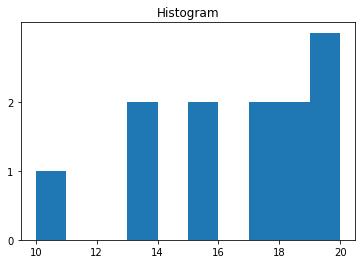

In [28]:
plotHistgram(df.Weight)

For the Age column.

([<matplotlib.axis.XTick at 0x1f72a475070>,
 <a list of 5 Text major ticklabel objects>)

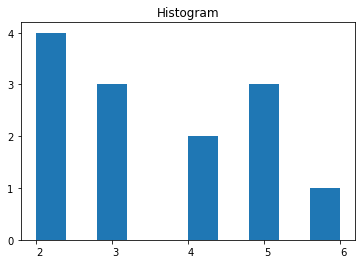

In [29]:
plotHistgram(df.Age)
plt.xticks([2, 3, 4, 5, 6], ha='left')

### 1.3 More decorations

If the x ticks are of (long) strings, we may specify its horizontal alignment (**ha**) and rotation mode (**rotation_mode**) to make it look better.
* ha: 'left', 'center', 'right'
* va: "top", "center", "baseline", "bottom" (for vertial alignment for y ticks)
* rotation_mode:<br>
    * 'default' (or None): first rotates the text and then aligns the bounding box of the rotated text.
    * 'anchor': aligns the unrotated text and then rotates the text around the point of alignment.
    
It may cost some time to show ticks in the best way through aligment and rotation, or it may not always possible to have them in the way you want if there's not much room for maneuver. 

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

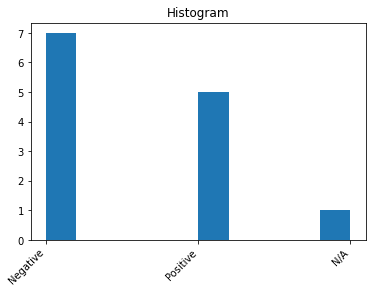

In [33]:
plotHistgram(df.Test)
plt.xticks(rotation=45, ha='right', rotation_mode='default')

### 1.4 (Exercise) Make a histogram for Age *without* using the function defined above.

([<matplotlib.axis.XTick at 0x222eb235c10>,
 <a list of 5 Text major ticklabel objects>)

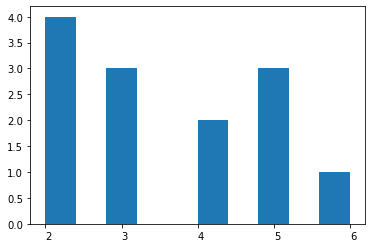

In [107]:
plt.hist(df.Age)

x_min = df.min(axis=0)['Age']
x_max = df.max(axis=0)['Age']

xticks = list(range(x_min, x_max+1))
plt.xticks(xticks, ha='left')

There are many tricks to beautify such a histogram, e.g., to position the bars closer or distanter from each other, to customize the X ticks. You may find such low level details from online examples if you need to use them. NB: They could be time-consuming to implement. 

### 1.5 (Exercise) Make a histogram for Height using the function defined above.

C:\Users\luhua\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\luhua\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


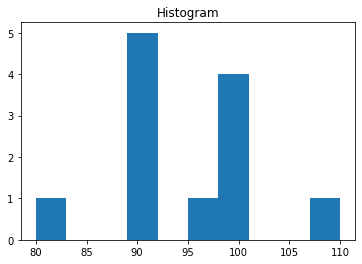

In [15]:
plotHistgram(df.Height)

### *1.6 Bins and bar width of histogram (Optional)

If you watch the histgram of Age carefully, you'll notice that the intervals between each pair of bars are not equal. 
It is because the number of 'bins' in plt.hist() is set to 10 by default. So there are acually 10 bars in the histgram, but only five of them have samples so they're blue. 

Let's try to beautify the histogram.

### bins
'bins' can be:
* int. It defines the number of equal-width bins in the range. 
* sequence. It defines the bin edges, including the left edge of the first bin and the right edge of the last bin; in this case, bins may be unequally spaced. All but the last (righthand-most) bin is half-open。
* string. You can refer to https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html for more description. 

We have 13 samples in this dataframe, each of them has an unique name, but there are bins that values=2 in the Name Histgram. This is because the default number of bins is 10, then some bars are merged.

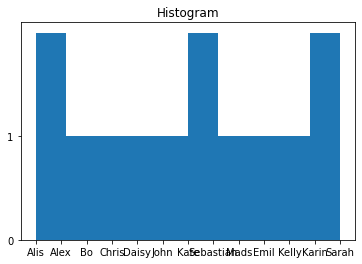

In [19]:
plotHistgram(df.Name)

If we set 'bins' into 13, which equals to the actual number of bars. Then each bar in the histogram has the same value 1.

Text(0.5, 1.0, 'Histogram')

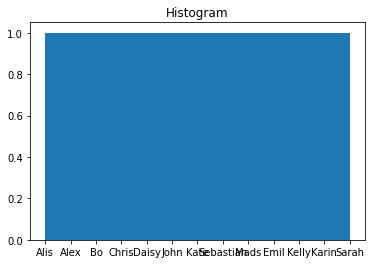

In [23]:
plt.hist(df.Name, bins=13)
plt.title("Histogram")

### rwidth
All bars are connected to each other which is not beatiful. Next we can reset the 'rwidth' which is the relative width of the bars as a fraction of the bin width

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Alis'),
  Text(1, 0, 'Alex'),
  Text(2, 0, 'Bo'),
  Text(3, 0, 'Chris'),
  Text(4, 0, 'Daisy'),
  Text(5, 0, 'John'),
  Text(6, 0, 'Kate'),
  Text(7, 0, 'Sebastian'),
  Text(8, 0, 'Mads'),
  Text(9, 0, 'Emil'),
  Text(10, 0, 'Kelly'),
  Text(11, 0, 'Karin'),
  Text(12, 0, 'Sarah')])

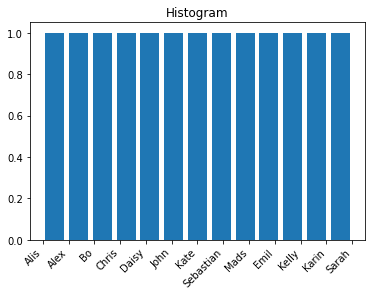

In [26]:
plt.hist(df.Name, bins=13, rwidth=0.8)
plt.title("Histogram")
plt.xticks(rotation=45, ha='right', rotation_mode='default')

It looks better but the bars are still not aligned with the xlabels. This is because all the width of bins are equally  set to range/num_bins. Try setting 'bins' to sequence.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Alis'),
  Text(1, 0, 'Alex'),
  Text(2, 0, 'Bo'),
  Text(3, 0, 'Chris'),
  Text(4, 0, 'Daisy'),
  Text(5, 0, 'John'),
  Text(6, 0, 'Kate'),
  Text(7, 0, 'Sebastian'),
  Text(8, 0, 'Mads'),
  Text(9, 0, 'Emil'),
  Text(10, 0, 'Kelly'),
  Text(11, 0, 'Karin'),
  Text(12, 0, 'Sarah')])

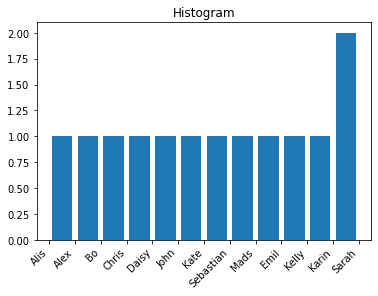

In [28]:
plt.hist(df.Name, bins=['Alis', 'Alex', 'Bo', 'Chris', 'Daisy', 'John', 'Kate', 'Sebastian', 'Mads', 'Emil', 'Kelly', 'Karin', 'Sarah'], rwidth=0.8)
plt.title("Histogram")
plt.xticks(rotation=45, ha='right', rotation_mode='default')

Now every bar is located in the center of each interval. Looks pretty good!
You can also change the alignment mode by setting the 'align' to 'left' or 'right'

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Alis'),
  Text(1, 0, 'Alex'),
  Text(2, 0, 'Bo'),
  Text(3, 0, 'Chris'),
  Text(4, 0, 'Daisy'),
  Text(5, 0, 'John'),
  Text(6, 0, 'Kate'),
  Text(7, 0, 'Sebastian'),
  Text(8, 0, 'Mads'),
  Text(9, 0, 'Emil'),
  Text(10, 0, 'Kelly'),
  Text(11, 0, 'Karin'),
  Text(12, 0, 'Sarah')])

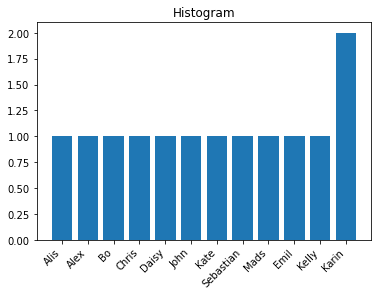

In [29]:
plt.hist(df.Name, bins=['Alis', 'Alex', 'Bo', 'Chris', 'Daisy', 'John', 'Kate', 'Sebastian', 'Mads', 'Emil', 'Kelly', 'Karin', 'Sarah'], rwidth=0.8, align='left')
plt.title("Histogram")
plt.xticks(rotation=45, ha='right', rotation_mode='default')

## 2. Bar chart

### 2.1 Make a bar chart about the age of all kids.

Text(0.5, 1.0, 'Age of each kid')

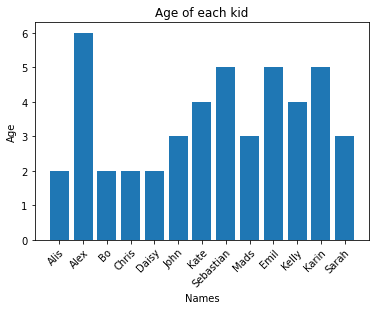

In [108]:
plt.bar(df.Name, df.Age)
plt.xlabel('Names')
plt.xticks(ha='right', rotation_mode='anchor', rotation=45)
plt.ylabel('Age')
plt.title('Age of each kid')

### 2.2 Make a bar chart about the number of kids per each gender group.

In [113]:
series_1 = df.groupby(['Gender'])['Name'].count()
series_1

Gender
Female    6
Male      7
Name: Name, dtype: int64

Text(0, 0.5, '#Kids')

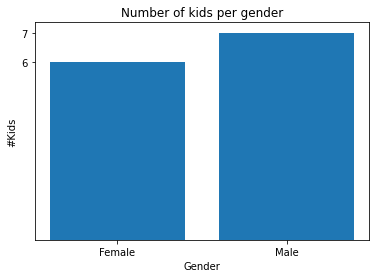

In [114]:
plt.bar(series_1.index, series_1.values)
plt.title('Number of kids per gender')
plt.yticks(series_1.values)
plt.xlabel('Gender')
plt.ylabel('#Kids')

### 2.3 Make a bar chart about the number of Positives and Negatives of each gender group.

In [118]:
series_3 = df.groupby(['Gender', 'Test'])['Test'].count()
series_3

Gender  Test    
Female  Negative    3
        Positive    3
Male    N/A         1
        Negative    4
        Positive    2
Name: Test, dtype: int64

([<matplotlib.axis.YTick at 0x222eca31670>,
 <a list of 5 Text major ticklabel objects>)

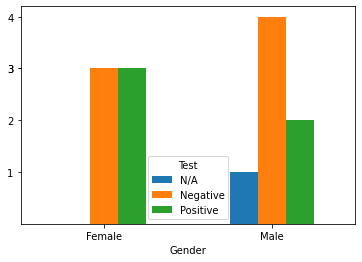

In [141]:
# Below rot=0 is needed to make the x ticks horizontal
series_3.unstack().plot(kind='bar', rot=0)
plt.yticks(series_3.values)

We may also show the bars in a stacked way, by set 'stacked' to True.

([<matplotlib.axis.YTick at 0x222edf20340>,
 <a list of 8 Text major ticklabel objects>)

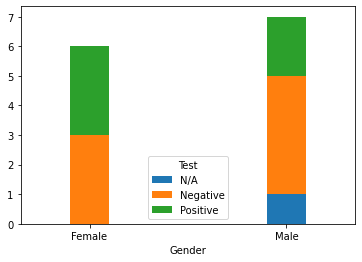

In [164]:
# Below the width parameter specifies the width of the bars
series_3.unstack().plot(kind='bar', stacked=True, rot=0, width=0.2)

# We should set the y ticks differently as above
# We get two counts each for a gender group
counts = df.groupby(['Gender'])['Test'].count()
# We use the larger count as the upper limit for the y ticks
plt.yticks(range(0, counts.values.max()+1))

### 2.4 (**Exercise**) Make a bar chart about the height (or weight) of all kids.

Text(0.5, 1.0, 'Height of each kid')

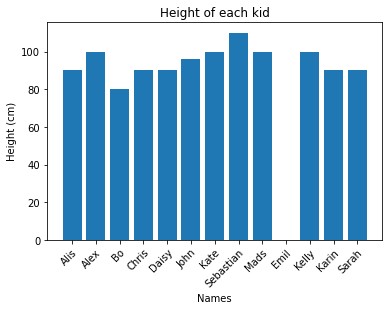

In [110]:
plt.bar(df.Name, df.Height)
plt.xlabel('Names')
plt.xticks(ha='right', rotation_mode='anchor', rotation=45)
plt.ylabel('Height (cm)')
plt.title('Height of each kid')

Text(0.5, 1.0, 'Weight of each kid')

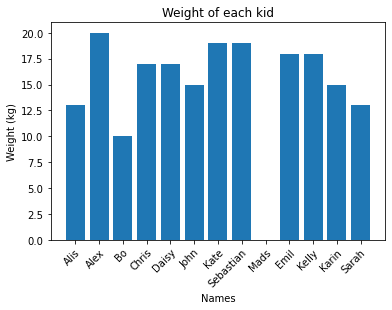

In [20]:
plt.bar(df.Name, df.Weight)
plt.xlabel('Names')
plt.xticks(ha='right', rotation_mode='anchor', rotation=45)
plt.ylabel('Weight (kg)')
plt.title('Weight of each kid')

### 2.5 (**Exercise**) Make a bar chart about the number of kids per each test result group.

In [23]:
series_2 = df.groupby(['Test'])['Name'].count()
series_2

Test
N/A         1
Negative    7
Positive    5
Name: Name, dtype: int64

Text(0, 0.5, '#Kids')

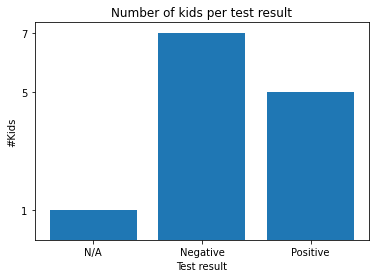

In [25]:
plt.bar(series_2.index, series_2.values)
plt.title('Number of kids per test result')
plt.yticks(series_2.values)
plt.xlabel('Test result')
plt.ylabel('#Kids')

### 2.6 (**Exercise**) Make a bar chart about the number of fever cases and no-fever cases of each gender group.

In [21]:
series_4 = df.groupby(['Gender', 'Fever'])['Fever'].count()
series_4

Gender  Fever
Female  No       4
        Yes      2
Male    No       2
        Yes      5
Name: Fever, dtype: int64

([<matplotlib.axis.YTick at 0x1f72b736b20>,
 <a list of 4 Text major ticklabel objects>)

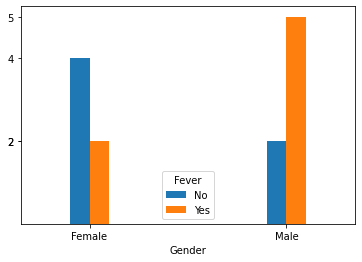

In [24]:
series_4.unstack().plot(kind='bar', rot=0, width=0.2)
plt.yticks(series_4.values)

([<matplotlib.axis.YTick at 0x1f72b6018b0>,
 <a list of 4 Text major ticklabel objects>)

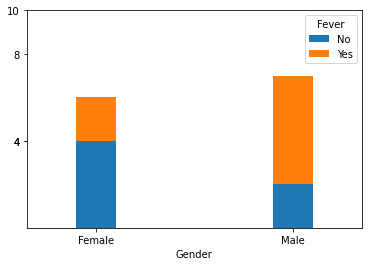

In [25]:
series_4.unstack().plot(kind='bar', stacked=True, rot=0, width=0.2)
plt.yticks(series_4.values*2)

## 3. Boxplot

### 3.1 Get the statistics of Age and make a boxplot for it

In [121]:
df['Age'].describe()

count    13.000000
mean      3.538462
std       1.391365
min       2.000000
25%       2.000000
50%       3.000000
75%       5.000000
max       6.000000
Name: Age, dtype: float64

([<matplotlib.axis.XTick at 0x222e81444f0>], [Text(0, 0, 'Age')])

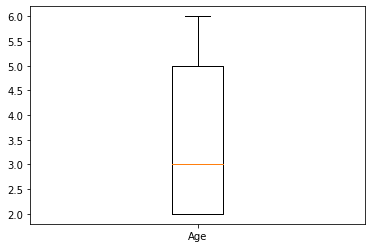

In [122]:
import matplotlib.pyplot as plt

plt.boxplot(df['Age'])
plt.xticks([1], ['Age'])

### 3.2 Get the statistics of Age for each gender group and make a boxplot for each

([<matplotlib.axis.XTick at 0x222ec592070>,
 [Text(0, 0, 'Male'), Text(0, 0, 'Female')])

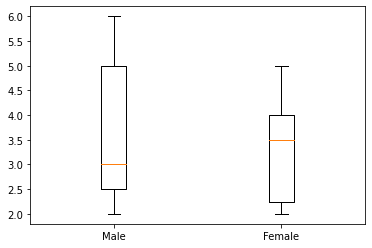

In [133]:
# We prepare a list of series objects, each having the age values for a specific gender.
data2plot = [df['Age'][df.Gender == 'Male'],
             df['Age'][df.Gender == 'Female']]

# We pass the list to boxplot() which will make a boxplot for each series object in the list
plt.boxplot(data2plot)

# Below, the first argument specifies the positions on the x axis to place the ticks,
# and the second argument gives a list of labels for the x ticks
plt.xticks(range(1, 3), ['Male', 'Female'], ha='center')

# We also save the graph into a disk file
#plt.savefig('boxes.jpg', dpi=300, bbox_inches='tight')

### 3.3 (Exercise) Make a boxplot for Weight

You need to assign values to missing values on Weight, otherwise nothing will be plotted. You may use forward filling (ffill)  on the data.

C:\Users\luhua\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\luhua\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\luhua\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\luhua\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x222ec837700>,
 'caps': [<matplotlib.lines.Line2D at 0x222ec837dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x222ec837550>],
 'medians': [<matplotlib.lines.Line2D at 0x222ec8424c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x222ec8427c0>],
 'means': []}

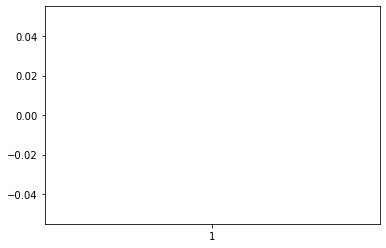

In [134]:
plt.boxplot(df['Weight'])

Text(0.5, 0, 'Weight')

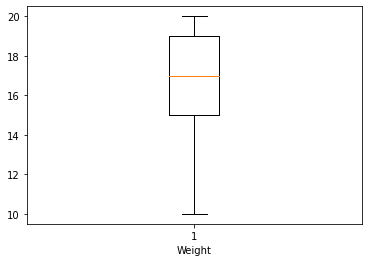

In [4]:
df2 = df.ffill()
df2['Weight'].describe()
plt.boxplot(df2['Weight'])
plt.xlabel('Weight')

### 3.4 (Exercise) Make two boxplots of Weight each for a gender group, in a single figure.

You also need to fill in for the missing value first.

([<matplotlib.axis.XTick at 0x259d4e53790>,
 [Text(0, 0, 'Male'), Text(0, 0, 'Female')])

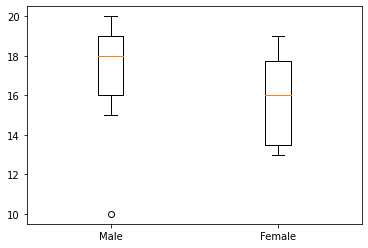

In [5]:
data2plot = [df2['Weight'][df.Gender == 'Male'],
             df2['Weight'][df.Gender == 'Female']]
plt.boxplot(data2plot)
plt.xticks(range(1, 3), ['Male', 'Female'], ha='center')

### 3.5 (Exercise) Make two boxplots of Height each for a gender group, in a single figure.

You also need to fill in for the missing value first.

([<matplotlib.axis.XTick at 0x259d4ecb0a0>,
 [Text(0, 0, 'Male'), Text(0, 0, 'Female')])

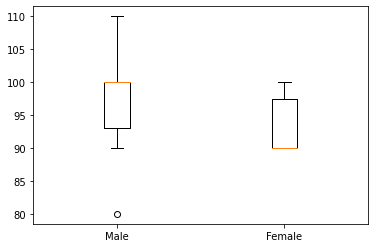

In [6]:
df3 = df.ffill()
data2plot = [df3['Height'][df.Gender == 'Male'],
             df3['Height'][df.Gender == 'Female']]
plt.boxplot(data2plot)
plt.xticks(range(1, 3), ['Male', 'Female'], ha='center')

## 4. Scatterplot

### 4.1 Age-weight scatterplot

Text(0, 0.5, 'Weight')

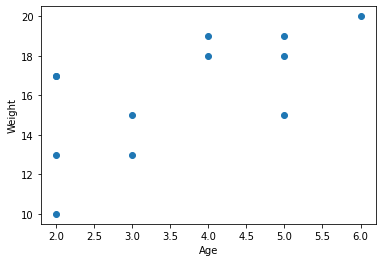

In [14]:
age_weight = df[['Age', 'Weight']]
plt.scatter(age_weight.Age, age_weight.Weight)
plt.xlabel('Age')
plt.ylabel('Weight')

### 4.2 Age-weight scatterplot for each gender group

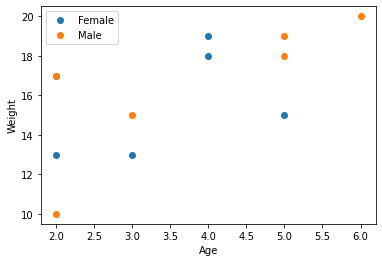

In [13]:
groups = df.groupby('Gender')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Age, group.Weight, marker='o', linestyle='', label=name)
ax.legend()

plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

### 4.3 (Exercise) Make a scatterplot for Weight and Height

Text(0, 0.5, 'Height')

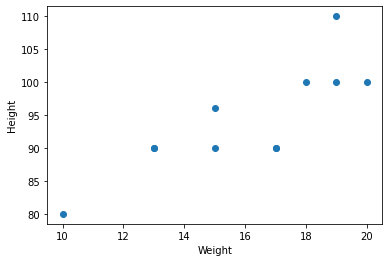

In [17]:
age_height = df[['Weight', 'Height']]
plt.scatter(age_height.Weight, age_height.Height)
plt.xlabel('Weight')
plt.ylabel('Height')

### 4.4 (Exercise) Make a scatterplot for Weight and Height for each gender group

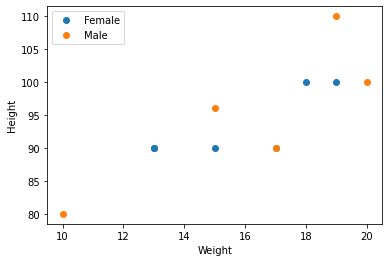

In [19]:
groups = df.groupby('Gender')

# Plot
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.Weight, group.Height, marker='o', linestyle='', label=name)
ax.legend()
plt.xlabel('Weight')
plt.ylabel('Height')

plt.show()

## 5. Line chart

Let's create another dataset about children's weights over a number of years

In [8]:
weights = pd.DataFrame([[2010, 5, 6, 4, 5],
                        [2011, 6, 7, 5, 7],
                        [2012, 6, 7, 7, 9],
                        [2013, 7, 9, 9, 10],
                        [2014, 9, 11, 10, 12],
                        [2015, 11, 12, 12, 13],
                        [2016, 13, 14, 14, 15],
                        [2017, 14, 15, 15, 16],
                        [2018, 17, 18, 18, 17],
                        [2019, 19, 20, 20, 19],
                        [2020, 20, 21, 20, 21]], 
                       columns=["Year", "Alex", "Emma", "Noah", "Will"])

weights

,Year,Alex,Emma,Noah,Will
0,2010,5,6,4,5
1,2011,6,7,5,7
2,2012,6,7,7,9
3,2013,7,9,9,10
4,2014,9,11,10,12
5,2015,11,12,12,13
6,2016,13,14,14,15
7,2017,14,15,15,16
8,2018,17,18,18,17
9,2019,19,20,20,19


### 5.1 Plot a line for each child over the years

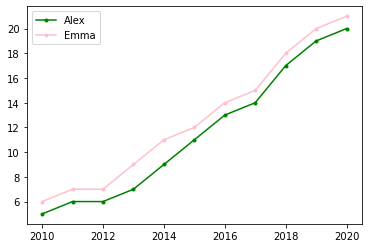

In [189]:
plt.plot(weights.Year, weights.Alex, 'b.-', label = 'Alex', color='green')
plt.plot(weights.Year, weights.Emma, 'b.-', label = 'Emma', color='pink')
#plt.plot(weights.Year, weights.Noah, 'b.-', label = 'Noach', color='blue')
#plt.plot(weights.Year, weights.Will, 'b.-', label = 'Will', color='gold')

plt.legend()

### 5.2 Plot the largest weight values over the years

Text(0, 0.5, 'Largest weight')

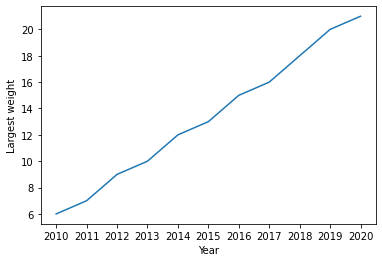

In [195]:
plt.plot(weights.Year, weights.iloc[:, 1:].max(axis=1))

# We get the year range from the Year column
yearRange = range(weights.min(axis=0)['Year'], weights.max(axis=0)['Year']+1, 1)
# We set the x axis to the year range
plt.xticks(yearRange)
plt.xlabel('Year')

plt.ylabel('Largest weight')

### (Exercises) 5.3 Plot the average weight values over the years

Text(0, 0.5, 'Largest weight')

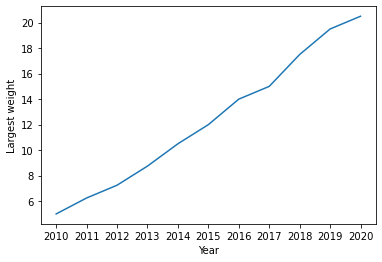

In [9]:
plt.plot(weights.Year, weights.iloc[:, 1:].mean(axis=1))
yearRange = range(weights.min(axis=0)['Year'], weights.max(axis=0)['Year']+1, 1)
plt.xticks(yearRange)
plt.xlabel('Year')

plt.ylabel('Largest weight')

### (Exercises) 5.4 Plot the smallest weight values over the years

Text(0, 0.5, 'Largest weight')

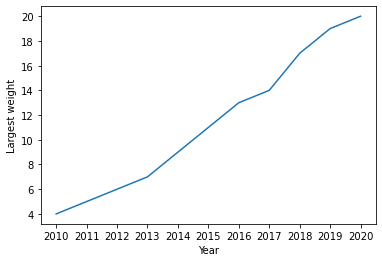

In [10]:
plt.plot(weights.Year, weights.iloc[:, 1:].min(axis=1))
yearRange = range(weights.min(axis=0)['Year'], weights.max(axis=0)['Year']+1, 1)
plt.xticks(yearRange)
plt.xlabel('Year')

plt.ylabel('Largest weight')

### (Exercises) 5.5 Plot both the average and smallest weight values over the years in a single plot

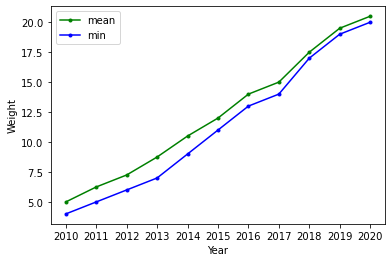

In [12]:
plt.plot(weights.Year, weights.iloc[:, 1:].mean(axis=1), 'b.-', label = 'mean', color='green')
plt.plot(weights.Year, weights.iloc[:, 1:].min(axis=1), 'b.-', label = 'min', color='blue')
yearRange = range(weights.min(axis=0)['Year'], weights.max(axis=0)['Year']+1, 1)
plt.xticks(yearRange)
plt.xlabel('Year')

plt.ylabel('Weight')

plt.legend()

## 6. Advanced visualization

### 6.1 (Exercise) Create a Heatmap for the kid health data set

What do you see from it?

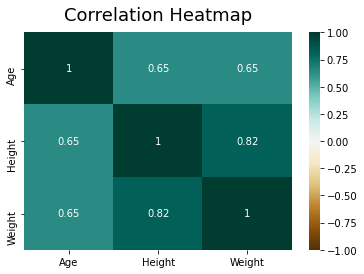

In [28]:
import seaborn as sns
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### 6.2 (Exercise) Create a Heatmap for the children weight data set

What do you see from it?

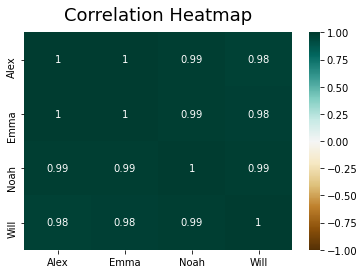

In [31]:
data = weights.drop(columns=['Year'])
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);